In [1]:
import numpy as np
import pandas as pd
import igraph as ig
from igraph import *

A graph is define as  G = (V,E) 

g = Graph(V,E,labels)
* V : list of vertex: type int 
* E: list of edges
    * an edge is represented as a list of staring edge, end edge and weight  [edge_1, edge_2, w_1_2]: type int
* labels : list of names of each vetex
    

In [22]:
class Graph:
    # Orienterd Graph (graphe orienté pondéré)
    def __init__(self,V,E,labels = None): 
        self.V = V
        self.E = E 
        self.labels = labels
        self.n = len(V)
        self.m = len(E)
        self.adj_matrix =  np.array([[0]*self.n for _ in range(self.n)]) 
        self.weight = np.array([[0]*self.n for _ in range(self.n)]) 

        self.adj_matrix = np.array([[0]*self.n for _ in range(self.n)]) 
        self.weight  = np.array([[0]*self.n for _ in range(self.n)]) 
        for edge in self.E:
            i = edge[0]
            j = edge[1]
            self.adj_matrix[i][j] = 1
            self.weight[i][j] = edge[2]

    # This function print adjency matrix as a dataframe
    def print_adjency_matrix(self):
        print(pd.DataFrame(self.adj_matrix, columns= self.labels, index=self.labels))

    # This function print weight matrix as a dataframe
    def print_weight_matrix(self):
        print(pd.DataFrame(self.weight, columns= self.labels, index=self.labels))

    # this function print the graph informations : number of nodes, edges, adjency matrix and weight matrix
    def graph_info(self):
        print("This graph has : ",self.n,"nodes and ", self.m,"edges")
        print("Adjency matrix")
        self.print_adjency_matrix()
        print("Weight matrix")
        self.print_weight_matrix()       


    # plot functions (inorder to plot the graph igrpah libary is used)
    # create_ig_graph(): create a graph using igraph based on our graph g 
    def create_ig_graph(self):
        A = pd.DataFrame(self.adj_matrix).values
        # create graph using igraph 
        # For that we need list of edges in the right order 
        g_plot = ig.Graph.Adjacency((A > 0).tolist())
        # Add edge weights to the graph
        g_plot.vs['label'] = self.labels
        # Add node labels to the graph
        g_plot.es["weight"] = self.weight.flatten()[self.weight.flatten() != 0].tolist()
        return g_plot
   
    # plot_graph() : plot a graph using igraph
    def plot_graph(self):
        g_plot = self.create_ig_graph()
        return plot(g_plot, layout=g_plot.layout(layout='auto'), edge_label=g_plot.es["weight"], bbox=(300, 300))
    
    # plot_graph_color_path() : generates a graph visualization where the edges are colored based on a provided list of nodes sequence
    def plot_graph_color_path(self,nodes_list):
        graph_edges, edges_list, edge_id_to_color = [], [], []

        g_plot = self.create_ig_graph()
        # we alrady have this so I will change it to self.E [:][0,1]
        #graph_edges = [[i, j] for i in range(len(self.adj_matrix)) for j in range(len(self.adj_matrix[i])) if self.adj_matrix[i][j] == 1]
        graph_edges = sorted(self.E, key=lambda x: (x[0], x[1]))
        graph_edges = [[x[0], x[1]] for x in graph_edges]
        print(graph_edges)

        edges_list = [[nodes_list[i], nodes_list[i+1]] for i in range(len(nodes_list)-1)] 
        
        # in igraph each edge has an id (eg. {AC, AB} 0 refer to AB, 1 refer to AC)
        edge_id_to_color = [j for i in range(len(edges_list)) for j in range(len(graph_edges)) if edges_list[i] == graph_edges[j]]

        # define edges color 
        edge_colors = ["red" if i in edge_id_to_color else "black" for i in range(len(g_plot.es))]  

        # define a style 
        visual_style = {
            "vertex_color": "lightblue",
            "edge_color": edge_colors,
            "edge_width": 2,
            "bbox": (300, 300),
            "margin": 20
        }
        return plot(g_plot, layout=g_plot.layout(layout='auto'), edge_label = g_plot.es["weight"], **visual_style)  
        


This graph has :  3 nodes and  3 edges
Adjency matrix
   A  B  C
A  0  1  1
B  0  0  0
C  0  1  0
Weight matrix
   A  B  C
A  0  1  3
B  0  0  0
C  0  4  0
[[0, 1], [0, 2], [2, 1]]
[[0, 1], [0, 2], [2, 1]]


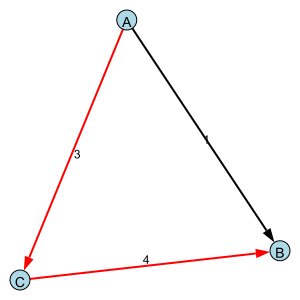

In [23]:
v = [0,1,2]
e = [[0,1,1],[0,2,3],[2,1,4]]
g = Graph(V=v,E=e, labels=['A','B','C'])
g.graph_info()
edge_seq = [0,2,1]
g.plot_graph_color_path(edge_seq)